In [37]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [39]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [40]:
# Use the print() function to displat the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-70.17458407008577 163.8781589280086
-30.893434237333857 29.701408585479356
-37.87018197979289 -2.832442257095522
44.910937386410296 37.29637202119477
-30.739068076444383 -156.51658241432247
74.00996750844837 -68.67076396626337
51.370364834746454 76.04151561454245
56.61748274818322 31.400258616147966
25.834845422292574 -77.2126258276489
-42.10723342630948 -76.00675597779002
-60.255927780910895 36.69529225500986
53.922319618938786 91.89030895367046
32.345454172601336 -164.6354684887183
-36.530933268326905 143.64116002994444
63.43630484597287 -162.8380158233932
74.01028480643029 -157.1082891205429
8.262970452516171 -158.05427463170648
49.76465865160836 -6.609091741827257
71.13870065255202 -20.615177194335757
-9.735634688042325 -143.20944921564865
-67.43417405766806 -176.97028989236216
78.8078920922515 157.83281546339953
84.61214678069629 6.143461993272581
8.061627785433345 -142.55287053684418
22.095231138107593 -124.67395820228114
15.83265068117305 -31.54246580498031
-64.44292731658541 6

55.30624220507599 60.611893765860685
61.77723215900403 78.58535487013972
-36.33741614438287 75.0119444073803
-76.46164665250333 -164.2275887540105
1.9781015920289207 36.57215331564956
10.415362033493466 100.26835191711348
-10.551828679478717 -119.54892180732776
81.88973065498274 -171.15103680765782
-80.5255484388231 -92.65687586735102
-84.02634668331473 -110.1815318117127
4.70129190633466 7.7867958694304775
-63.03047458929955 -15.405607138510987
0.41355930020016274 -17.072120572899223
47.46174435140412 -71.80058472853814
51.680299915525694 -45.16284669933762
-74.01988903254728 32.83377738925165
-18.172420968991403 -33.22017615425062
-74.09174923282902 100.54982965998619
-16.360460525352096 0.37700335097216
-45.70804533553851 113.63772401038966
47.333877621577955 -151.77218488139013
39.952194242027616 57.375185699104435
72.59597131880767 -31.070881252756834
12.64462080020212 -100.8053391871303
-3.797712785037433 -14.501261145608169
44.40608766896062 -83.94899604451187
69.0431143217304 -

In [41]:
# import citipy dependencies.
from citipy import citipy

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

647

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [44]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [55]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [57]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | kokstad
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | tsibanobalka
Processing Record 5 of Set 1 | avera
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | maykain
City not found. Skipping...
Processing Record 8 of Set 1 | toropets
Processing Record 9 of Set 1 | dunmore town
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | sayanskiy
City not found. Skipping...
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | maryborough
Processing Record 15 of Set 1 | nome
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | penzance
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 |

Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | huarmey
Processing Record 43 of Set 4 | jasper
Processing Record 44 of Set 4 | bredasdorp
Processing Record 45 of Set 4 | requena
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | kamenka
Processing Record 48 of Set 4 | gulshat
City not found. Skipping...
Processing Record 49 of Set 4 | masaba
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | kloulklubed
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | mezen
Processing Record 5 of Set 5 | storsteinnes
Processing Record 6 of Set 5 | novikovo
Processing Record 7 of Set 5 | sibu
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | suoyarvi
Proc

Processing Record 24 of Set 8 | jennings
Processing Record 25 of Set 8 | sumbal
Processing Record 26 of Set 8 | dickinson
Processing Record 27 of Set 8 | puerto madryn
Processing Record 28 of Set 8 | pochutla
Processing Record 29 of Set 8 | peru
Processing Record 30 of Set 8 | roald
Processing Record 31 of Set 8 | aldan
Processing Record 32 of Set 8 | nichinan
Processing Record 33 of Set 8 | miyako
Processing Record 34 of Set 8 | devgarh
Processing Record 35 of Set 8 | kirkwall
Processing Record 36 of Set 8 | vilhena
Processing Record 37 of Set 8 | port macquarie
Processing Record 38 of Set 8 | waitati
Processing Record 39 of Set 8 | yenagoa
Processing Record 40 of Set 8 | chicama
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | yankton
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | bentiu
Processing Record 45 of Set 8 | anadyr
Processing Record 46 of Set 8 | kirakira
Processing Record 47 of Set 8 | poronaysk
Processing Record 48 o

Processing Record 15 of Set 12 | tiznit
Processing Record 16 of Set 12 | yining
Processing Record 17 of Set 12 | poya
Processing Record 18 of Set 12 | peniche
Processing Record 19 of Set 12 | kendari
Processing Record 20 of Set 12 | adre
Processing Record 21 of Set 12 | muli
Processing Record 22 of Set 12 | kangaba
Processing Record 23 of Set 12 | asosa
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | kamaishi
Processing Record 26 of Set 12 | tarauaca
Processing Record 27 of Set 12 | sao filipe
Processing Record 28 of Set 12 | maneadero
Processing Record 29 of Set 12 | sultanpur
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | zhengjiatun
Processing Record 32 of Set 12 | makakilo city
Processing Record 33 of Set 12 | honningsvag
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | grand gaube
Processing Record 36 of Set 12 | whitehorse
Processing Record 37 of Set 12 | coos bay
Processing Record 38 of Se

In [65]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,44.80,78,100,15.19,NZ,2022-07-16 19:18:17
1,Kokstad,-30.5472,29.4241,50.50,46,0,4.21,ZA,2022-07-16 19:20:20
2,Luderitz,-26.6481,15.1594,68.04,38,0,2.01,NA,2022-07-16 19:20:20
3,Tsibanobalka,44.9803,37.3438,71.56,83,0,2.24,RU,2022-07-16 19:20:21
4,Avera,33.1940,-82.5271,90.55,46,38,3.60,US,2022-07-16 19:20:08
5,Narsaq,60.9167,-46.0500,52.02,79,100,5.08,GL,2022-07-16 19:20:21
6,Toropets,56.4978,31.6353,53.42,79,100,3.67,RU,2022-07-16 19:20:22
7,Dunmore Town,25.5000,-76.6500,82.83,78,99,15.26,BS,2022-07-16 19:20:22
8,Ancud,-41.8697,-73.8203,42.22,83,100,19.82,CL,2022-07-16 19:20:22
9,Port Alfred,-33.5906,26.8910,67.30,53,0,8.30,ZA,2022-07-16 19:18:14


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Exract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

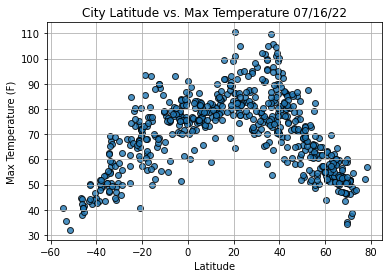

In [68]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

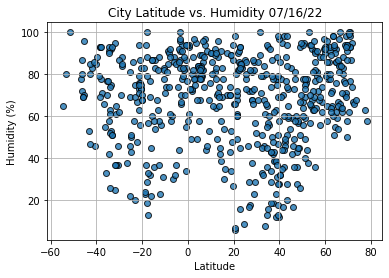

In [71]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

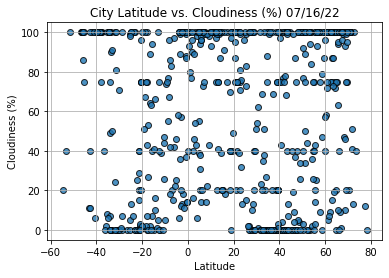

In [72]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

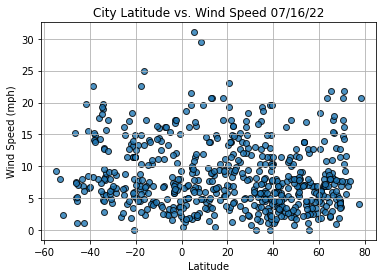

In [73]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Tsibanobalka,44.9803,37.3438,71.56,83,0,2.24,RU,2022-07-16 19:20:21
4,Avera,33.1940,-82.5271,90.55,46,38,3.60,US,2022-07-16 19:20:08
5,Narsaq,60.9167,-46.0500,52.02,79,100,5.08,GL,2022-07-16 19:20:21
6,Toropets,56.4978,31.6353,53.42,79,100,3.67,RU,2022-07-16 19:20:22
7,Dunmore Town,25.5000,-76.6500,82.83,78,99,15.26,BS,2022-07-16 19:20:22


In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

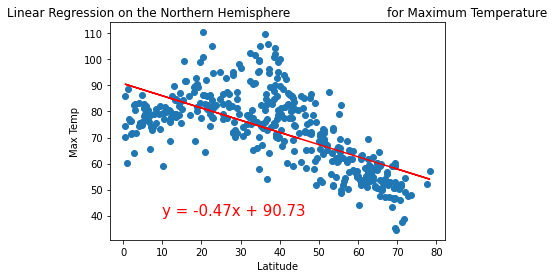

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


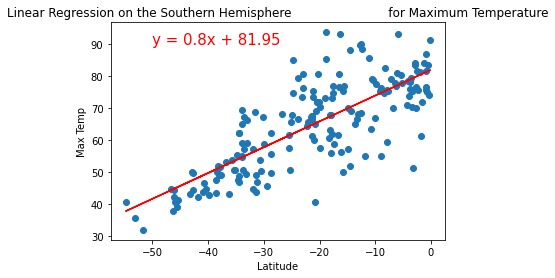

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

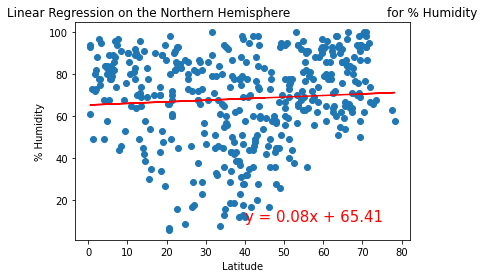

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

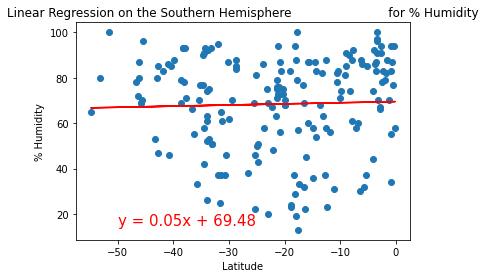

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

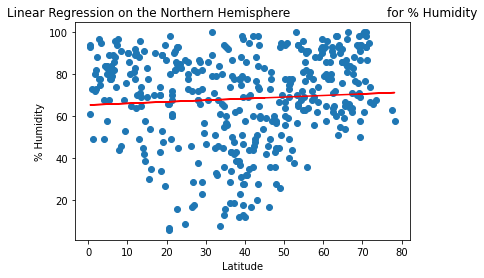

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(-40,20))

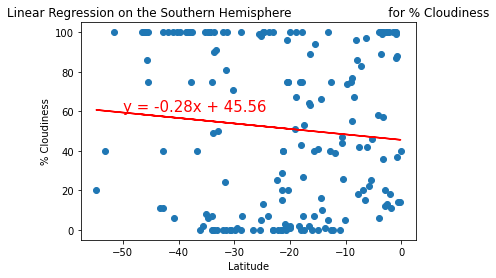

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

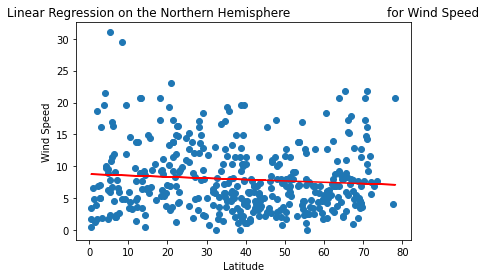

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

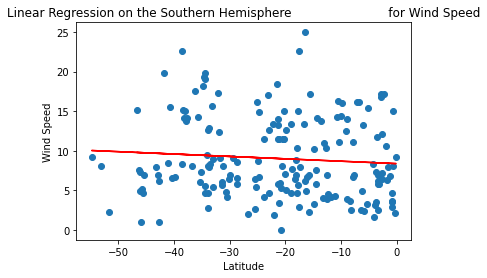

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))